<a href="https://colab.research.google.com/github/samsung-chow/324-Project/blob/main/tree_models/RF_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload cleaned_data.CSV (in github repo)
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.CSV to cleaned_data.CSV


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load data
df = pd.read_csv('cleaned_data.CSV')

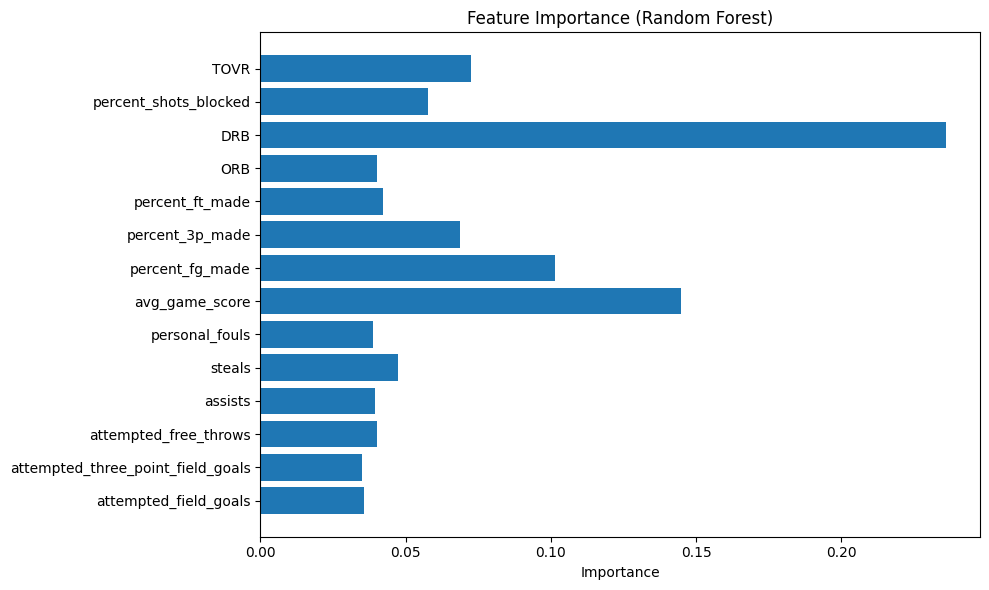

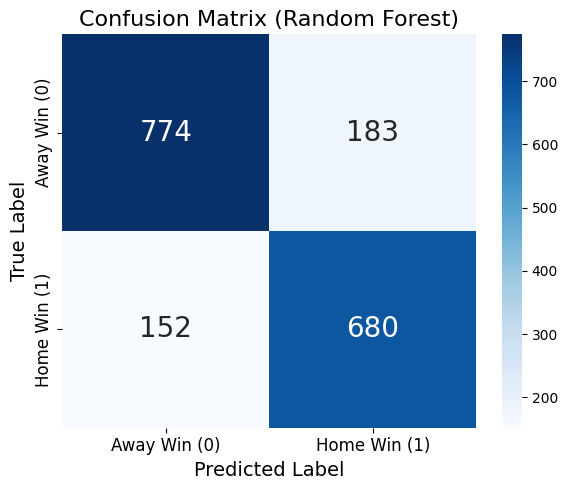

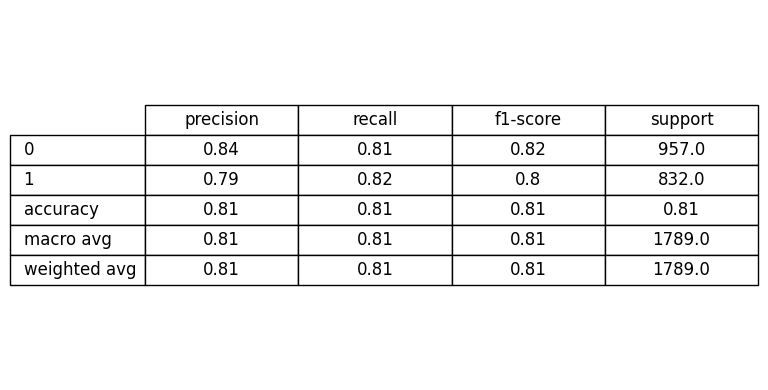

In [ ]:
# Feature columns
feature_cols = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

X = df[feature_cols]
y = df['team_win']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_cols, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Confusion Matrix
class_labels = ['Away Win (0)', 'Home Win (1)']
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=class_labels, yticklabels=class_labels,
                 annot_kws={"size": 20})
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix (Random Forest)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
tbl = ax.table(cellText=report_df.round(2).values,
               colLabels=report_df.columns,
               rowLabels=report_df.index,
               cellLoc='center',
               loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.5)
plt.tight_layout()
plt.show()